In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import catboost

In [158]:
df = pd.read_csv('D:/PredictLateArrivals_Dataset/flights.csv')
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


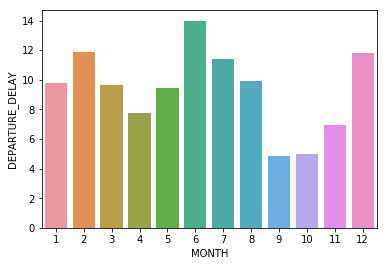

In [160]:
df_month = df.groupby(['MONTH'])[['DEPARTURE_DELAY']].mean()
df_month.reset_index(inplace=True)
sns.barplot(x='MONTH',y='DEPARTURE_DELAY',data=df_month)

In [161]:
df['DEPARTURE_DELAY']

0          -11.0
1           -8.0
2           -2.0
3           -5.0
4           -1.0
5           -5.0
6           -6.0
7           14.0
8          -11.0
9            3.0
10          -6.0
11          -8.0
12           0.0
13          -6.0
14          -1.0
15          -4.0
16         -14.0
17          -6.0
18          -4.0
19          -5.0
20          25.0
21          -8.0
22          -1.0
23          -2.0
24          -3.0
25          -3.0
26          -8.0
27          12.0
28         -10.0
29          21.0
           ...  
5819049      2.0
5819050      2.0
5819051     16.0
5819052    -15.0
5819053      0.0
5819054     -5.0
5819055     -2.0
5819056     -3.0
5819057     13.0
5819058     -7.0
5819059     -8.0
5819060     -5.0
5819061     -3.0
5819062      6.0
5819063      2.0
5819064     -3.0
5819065     -7.0
5819066     -2.0
5819067     -8.0
5819068     -1.0
5819069    159.0
5819070      0.0
5819071     16.0
5819072      7.0
5819073     16.0
5819074     -4.0
5819075     -4.0
5819076     -9

In [117]:
df.drop(['TAXI_IN','WHEELS_ON','FLIGHT_NUMBER','TAIL_NUMBER','CANCELLATION_REASON'],axis=1,inplace=True)
df.drop(['YEAR','CANCELLED','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis = 1,inplace=True)
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str)
df = df[df.ORIGIN_AIRPORT.apply(lambda x:True if len(x) == 3 else False)]
df.drop(['DAY','DAY_OF_WEEK','AIR_TIME','ARRIVAL_TIME','DIVERTED'],axis=1,inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5332914 entries, 0 to 5819078
Data columns (total 14 columns):
MONTH                  int64
AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
DISTANCE               int64
SCHEDULED_ARRIVAL      int64
ARRIVAL_DELAY          float64
dtypes: float64(7), int64(4), object(3)
memory usage: 610.3+ MB


In [119]:
df.head()

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,1,AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,1448,430,-22.0
1,1,AA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,2330,750,-9.0
2,1,US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,2296,806,5.0
3,1,AA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,2342,805,-9.0
4,1,AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,1448,320,-21.0


In [120]:
df.dropna(how='any',axis=0,inplace=True)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5231130 entries, 0 to 5819078
Data columns (total 14 columns):
MONTH                  int64
AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
DISTANCE               int64
SCHEDULED_ARRIVAL      int64
ARRIVAL_DELAY          float64
dtypes: float64(7), int64(4), object(3)
memory usage: 598.7+ MB


In [122]:
df.drop(['ELAPSED_TIME'],axis=1,inplace=True)

In [123]:
df.head()

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,1,AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,1448,430,-22.0
1,1,AA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,2330,750,-9.0
2,1,US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,2296,806,5.0
3,1,AA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,2342,805,-9.0
4,1,AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,1448,320,-21.0


In [124]:
df.head()

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
0,1,AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,1448,430,-22.0
1,1,AA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,2330,750,-9.0
2,1,US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,2296,806,5.0
3,1,AA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,2342,805,-9.0
4,1,AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,1448,320,-21.0


In [125]:
df.drop(['DEPARTURE_TIME','TAXI_OUT','WHEELS_OFF'],axis=1, inplace=True)
#df.drop(['DEPARTURE_TIME'],axis=1,inplace=True)

In [126]:
df.drop(['ARRIVAL_DELAY'],axis=1,inplace=True)

In [127]:
corr_matrix = df.corr()

In [128]:
corr_matrix

,MONTH,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
MONTH,1.000000,0.000886,-0.011668,0.012990,0.012892,-0.011570
SCHEDULED_DEPARTURE,0.000886,1.000000,0.113375,-0.015233,-0.008081,0.702904
DEPARTURE_DELAY,-0.011668,0.113375,1.000000,0.027278,0.023548,0.099751
SCHEDULED_TIME,0.012990,-0.015233,0.027278,1.000000,0.984171,0.031829
DISTANCE,0.012892,-0.008081,0.023548,0.984171,1.000000,0.026976
SCHEDULED_ARRIVAL,-0.011570,0.702904,0.099751,0.031829,0.026976,1.000000


In [129]:
df['target_departure'] = df['DEPARTURE_DELAY'].apply(lambda x: 0 if x < 0 else 1)

In [130]:
#df_zero = df[df['target_departure'] == 0]

In [131]:
#len(df_zero)

In [132]:
#df_one = df[df['target_departure'] == 1]

In [133]:
#df_one['DEPARTURE_DELAY'].median()

In [134]:
#df_one['target_departure'] = df_one['DEPARTURE_DELAY'].apply(lambda x: 1 if x < 11 else 2)

In [135]:
#df_1 = df_one[df_one['target_departure'] == 1]
#len(df_1)

In [136]:
#df_2 = df_one[df_one['target_departure'] == 2]
#len(df_2)

In [137]:
#len(df_zero)

In [138]:
#df_zero_sample = df_zero.sample(n=1000004,axis=0)

In [139]:
#len(df_zero_sample)

In [140]:
#final_df = pd.concat([df_zero_sample,df_one],ignore_index=True)

In [141]:
#final_df.head()

In [142]:
#len(final_df)

In [143]:
#len(final_df[final_df['target_departure'] == 0])

In [144]:
#len(final_df[final_df['target_departure'] == 1])

In [145]:
#len(final_df[final_df['target_departure'] == 2])

In [146]:
#final_df.drop(['DEPARTURE_DELAY'],axis=1,inplace=True)

In [147]:
#final_df.head()

In [148]:
df.drop(['DEPARTURE_DELAY'],axis=1,inplace=True)

In [149]:
df.head()

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,target_departure
0,1,AS,ANC,SEA,5,205.0,1448,430,0
1,1,AA,LAX,PBI,10,280.0,2330,750,0
2,1,US,SFO,CLT,20,286.0,2296,806,0
3,1,AA,LAX,MIA,20,285.0,2342,805,0
4,1,AS,SEA,ANC,25,235.0,1448,320,0


In [150]:
df['target_departure'].unique()

array([0, 1], dtype=int64)

In [151]:
#len(final_df)

In [152]:
X = df.drop(['target_departure'],axis=1)
y = df['target_departure']

In [153]:
#X = final_df.drop(['target_departure'],axis=1)
#y = final_df['target_departure']

In [154]:
X.head()

,MONTH,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL
0,1,AS,ANC,SEA,5,205.0,1448,430
1,1,AA,LAX,PBI,10,280.0,2330,750
2,1,US,SFO,CLT,20,286.0,2296,806
3,1,AA,LAX,MIA,20,285.0,2342,805
4,1,AS,SEA,ANC,25,235.0,1448,320


In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 43)

In [156]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
cat_features=[0,1,2,3]
model = CatBoostClassifier(iterations=1000,
                           task_type="GPU",
                           depth=9,
                           learning_rate=0.8,
                           per_float_feature_quantization=['2:border_count=1024', '3:border_count=1024'],
                           loss_function='Logloss',
                           verbose=True)
# train the model
model.fit(X_train,y_train, cat_features)
# make the prediction using the resulting model
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)
print("accuracy = ", accuracy_score(y_test,preds_class))

0:	learn: 0.6362556	total: 1.4s	remaining: 23m 17s
1:	learn: 0.6308759	total: 2.4s	remaining: 19m 56s
2:	learn: 0.6291163	total: 3.23s	remaining: 17m 52s
3:	learn: 0.6281877	total: 3.94s	remaining: 16m 21s
4:	learn: 0.6274368	total: 4.8s	remaining: 15m 55s
5:	learn: 0.6268409	total: 5.7s	remaining: 15m 43s
6:	learn: 0.6261985	total: 6.42s	remaining: 15m 10s
7:	learn: 0.6254540	total: 7.33s	remaining: 15m 9s
8:	learn: 0.6249520	total: 8.13s	remaining: 14m 55s
9:	learn: 0.6245107	total: 9.31s	remaining: 15m 22s
10:	learn: 0.6240830	total: 10.4s	remaining: 15m 32s
11:	learn: 0.6237313	total: 11.2s	remaining: 15m 22s
12:	learn: 0.6234691	total: 12.1s	remaining: 15m 19s
13:	learn: 0.6231777	total: 12.9s	remaining: 15m 8s
14:	learn: 0.6228869	total: 13.5s	remaining: 14m 48s
15:	learn: 0.6227368	total: 14.3s	remaining: 14m 41s
16:	learn: 0.6225985	total: 15.2s	remaining: 14m 40s
17:	learn: 0.6223652	total: 16.3s	remaining: 14m 47s
18:	learn: 0.6221755	total: 17.2s	remaining: 14m 46s
19:	learn

154:	learn: 0.6125931	total: 2m 17s	remaining: 12m 28s
155:	learn: 0.6125408	total: 2m 18s	remaining: 12m 27s
156:	learn: 0.6125160	total: 2m 19s	remaining: 12m 27s
157:	learn: 0.6124615	total: 2m 19s	remaining: 12m 25s
158:	learn: 0.6123984	total: 2m 20s	remaining: 12m 24s
159:	learn: 0.6123581	total: 2m 21s	remaining: 12m 24s
160:	learn: 0.6123348	total: 2m 22s	remaining: 12m 22s
161:	learn: 0.6123203	total: 2m 23s	remaining: 12m 21s
162:	learn: 0.6122792	total: 2m 24s	remaining: 12m 19s
163:	learn: 0.6122332	total: 2m 25s	remaining: 12m 20s
164:	learn: 0.6121877	total: 2m 25s	remaining: 12m 18s
165:	learn: 0.6121390	total: 2m 26s	remaining: 12m 17s
166:	learn: 0.6120942	total: 2m 27s	remaining: 12m 16s
167:	learn: 0.6120598	total: 2m 28s	remaining: 12m 14s
168:	learn: 0.6120366	total: 2m 29s	remaining: 12m 14s
169:	learn: 0.6119733	total: 2m 30s	remaining: 12m 13s
170:	learn: 0.6119379	total: 2m 31s	remaining: 12m 13s
171:	learn: 0.6119035	total: 2m 32s	remaining: 12m 12s
172:	learn

305:	learn: 0.6066664	total: 4m 36s	remaining: 10m 26s
306:	learn: 0.6066131	total: 4m 37s	remaining: 10m 25s
307:	learn: 0.6065737	total: 4m 38s	remaining: 10m 25s
308:	learn: 0.6065337	total: 4m 39s	remaining: 10m 24s
309:	learn: 0.6064931	total: 4m 40s	remaining: 10m 23s
310:	learn: 0.6064569	total: 4m 40s	remaining: 10m 22s
311:	learn: 0.6064189	total: 4m 41s	remaining: 10m 21s
312:	learn: 0.6063986	total: 4m 43s	remaining: 10m 21s
313:	learn: 0.6063691	total: 4m 43s	remaining: 10m 20s
314:	learn: 0.6063418	total: 4m 44s	remaining: 10m 19s
315:	learn: 0.6063137	total: 4m 45s	remaining: 10m 18s
316:	learn: 0.6062952	total: 4m 46s	remaining: 10m 17s
317:	learn: 0.6062683	total: 4m 47s	remaining: 10m 16s
318:	learn: 0.6062419	total: 4m 48s	remaining: 10m 15s
319:	learn: 0.6062175	total: 4m 49s	remaining: 10m 14s
320:	learn: 0.6061695	total: 4m 50s	remaining: 10m 14s
321:	learn: 0.6061348	total: 4m 51s	remaining: 10m 13s
322:	learn: 0.6060974	total: 4m 52s	remaining: 10m 12s
323:	learn

458:	learn: 0.6013871	total: 7m	remaining: 8m 15s
459:	learn: 0.6013599	total: 7m 1s	remaining: 8m 14s
460:	learn: 0.6013182	total: 7m 2s	remaining: 8m 14s
461:	learn: 0.6012880	total: 7m 3s	remaining: 8m 13s
462:	learn: 0.6012432	total: 7m 4s	remaining: 8m 12s
463:	learn: 0.6012053	total: 7m 5s	remaining: 8m 11s
464:	learn: 0.6011527	total: 7m 6s	remaining: 8m 10s
465:	learn: 0.6011204	total: 7m 7s	remaining: 8m 9s
466:	learn: 0.6010630	total: 7m 8s	remaining: 8m 8s
467:	learn: 0.6010406	total: 7m 8s	remaining: 8m 7s
468:	learn: 0.6010058	total: 7m 9s	remaining: 8m 6s
469:	learn: 0.6009658	total: 7m 10s	remaining: 8m 5s
470:	learn: 0.6009422	total: 7m 11s	remaining: 8m 4s
471:	learn: 0.6008996	total: 7m 12s	remaining: 8m 4s
472:	learn: 0.6008540	total: 7m 13s	remaining: 8m 3s
473:	learn: 0.6008166	total: 7m 14s	remaining: 8m 2s
474:	learn: 0.6007934	total: 7m 15s	remaining: 8m 1s
475:	learn: 0.6007771	total: 7m 16s	remaining: 8m
476:	learn: 0.6007399	total: 7m 17s	remaining: 7m 59s
47

612:	learn: 0.5964013	total: 9m 25s	remaining: 5m 56s
613:	learn: 0.5963913	total: 9m 26s	remaining: 5m 56s
614:	learn: 0.5963618	total: 9m 27s	remaining: 5m 55s
615:	learn: 0.5963380	total: 9m 27s	remaining: 5m 54s
616:	learn: 0.5962958	total: 9m 28s	remaining: 5m 53s
617:	learn: 0.5962665	total: 9m 29s	remaining: 5m 52s
618:	learn: 0.5962458	total: 9m 30s	remaining: 5m 51s
619:	learn: 0.5962268	total: 9m 31s	remaining: 5m 50s
620:	learn: 0.5961869	total: 9m 32s	remaining: 5m 49s
621:	learn: 0.5961551	total: 9m 33s	remaining: 5m 48s
622:	learn: 0.5961168	total: 9m 34s	remaining: 5m 47s
623:	learn: 0.5960742	total: 9m 34s	remaining: 5m 46s
624:	learn: 0.5960339	total: 9m 36s	remaining: 5m 45s
625:	learn: 0.5960144	total: 9m 36s	remaining: 5m 44s
626:	learn: 0.5959781	total: 9m 37s	remaining: 5m 43s
627:	learn: 0.5959656	total: 9m 38s	remaining: 5m 42s
628:	learn: 0.5959399	total: 9m 39s	remaining: 5m 41s
629:	learn: 0.5959116	total: 9m 40s	remaining: 5m 40s
630:	learn: 0.5958843	total:

763:	learn: 0.5917577	total: 11m 45s	remaining: 3m 37s
764:	learn: 0.5917301	total: 11m 46s	remaining: 3m 36s
765:	learn: 0.5917025	total: 11m 47s	remaining: 3m 36s
766:	learn: 0.5916622	total: 11m 48s	remaining: 3m 35s
767:	learn: 0.5916323	total: 11m 49s	remaining: 3m 34s
768:	learn: 0.5915981	total: 11m 50s	remaining: 3m 33s
769:	learn: 0.5915606	total: 11m 50s	remaining: 3m 32s
770:	learn: 0.5915327	total: 11m 51s	remaining: 3m 31s
771:	learn: 0.5915090	total: 11m 52s	remaining: 3m 30s
772:	learn: 0.5914786	total: 11m 53s	remaining: 3m 29s
773:	learn: 0.5914359	total: 11m 54s	remaining: 3m 28s
774:	learn: 0.5914049	total: 11m 55s	remaining: 3m 27s
775:	learn: 0.5913903	total: 11m 56s	remaining: 3m 26s
776:	learn: 0.5913489	total: 11m 57s	remaining: 3m 25s
777:	learn: 0.5913149	total: 11m 58s	remaining: 3m 24s
778:	learn: 0.5912864	total: 11m 59s	remaining: 3m 24s
779:	learn: 0.5912592	total: 12m	remaining: 3m 23s
780:	learn: 0.5912219	total: 12m	remaining: 3m 22s
781:	learn: 0.5911

914:	learn: 0.5871204	total: 14m 6s	remaining: 1m 18s
915:	learn: 0.5871025	total: 14m 7s	remaining: 1m 17s
916:	learn: 0.5870759	total: 14m 8s	remaining: 1m 16s
917:	learn: 0.5870550	total: 14m 9s	remaining: 1m 15s
918:	learn: 0.5870234	total: 14m 10s	remaining: 1m 14s
919:	learn: 0.5869804	total: 14m 11s	remaining: 1m 14s
920:	learn: 0.5869448	total: 14m 11s	remaining: 1m 13s
921:	learn: 0.5869006	total: 14m 12s	remaining: 1m 12s
922:	learn: 0.5868802	total: 14m 13s	remaining: 1m 11s
923:	learn: 0.5868455	total: 14m 14s	remaining: 1m 10s
924:	learn: 0.5868302	total: 14m 15s	remaining: 1m 9s
925:	learn: 0.5867982	total: 14m 16s	remaining: 1m 8s
926:	learn: 0.5867565	total: 14m 17s	remaining: 1m 7s
927:	learn: 0.5867360	total: 14m 18s	remaining: 1m 6s
928:	learn: 0.5867044	total: 14m 19s	remaining: 1m 5s
929:	learn: 0.5866780	total: 14m 20s	remaining: 1m 4s
930:	learn: 0.5866526	total: 14m 21s	remaining: 1m 3s
931:	learn: 0.5866302	total: 14m 22s	remaining: 1m 2s
932:	learn: 0.5866163	

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
df['AIRLINE']= le.fit_transform(df['AIRLINE'])
df['ORIGIN_AIRPORT']= le.fit_transform(df['ORIGIN_AIRPORT']) 
df['DESTINATION_AIRPORT'] = le.fit_transform(df['DESTINATION_AIRPORT'])

In [36]:
import xgboost as xgb
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations
model = xgb.train(param, D_train, steps)
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

ValueError: ignored